# <center>Análise de sorteios da Mega-Sena</center>

A ideia nessa análise é olhar para as dezenas sorteadas, desde o primeiro concurso, e perceber se há algum comportamento frequente ao ponto de chegar numa montagem de jogo para fazer uma aposta.

>Usei esses módulos:
>
>* Pandas
>
>    Importado para trabalhar com datasets
>
>
>* Matplotlib (pyplot)
>* Numpy
>
>    Ambos acima para montagem de gráficos
>
>
>* Collections
>
>    Importado para facilitar na pesquisa de jogos repetidos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

## Dataset de jogos

A planilha que dá origem ao dataset de jogos foi baixada do site abaixo:

https://asloterias.com.br/download-todos-resultados-mega-sena

A importação é feita ignorando algumas linhas iniciais, conversão em data na coluna de data do concurso, renomeada as colunas e exibo as 10 primeiras linhas para ter uma ideia de como estão os dados.

In [2]:
df = pd.read_excel('mega_sena_asloterias_ate_concurso_2471_sorteio.xlsx', skiprows=6, parse_dates=['Data'])

In [3]:
df.columns = ['concurso', 'data', 'bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6' ]

In [4]:
df.head(10)

,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6
0,2471,2022-04-13,30,8,23,29,55,36
1,2470,2022-09-04,51,8,48,42,33,40
2,2469,2022-06-04,5,55,38,30,28,52
3,2468,2022-02-04,22,41,53,42,35,57
4,2467,2022-03-30,1,10,45,19,35,34
5,2466,2022-03-26,54,53,20,2,13,3
6,2465,2022-03-23,29,54,53,8,3,23
7,2464,2022-03-19,2,43,7,52,24,56
8,2463,2022-03-16,11,31,16,42,51,37
9,2462,2022-12-03,3,16,57,23,45,41


## Nova coluna com dezenas ordenadas

Percebe-se que as colunas com as dezenas sorteadas mostram os números na ordem que o sorteio aconteceu.

Faço, então, a inclusão de uma nova coluna ao dataset com as dezenas sorteadas em ordem crescente.

Isto é necessário para atender as pesquisas que serão feitas.

In [5]:
lst_cols = list(df.columns[2:])  # ['bola1','bola2','bola3','bola4','bola5','bola6']
lst_jogo, lst_concurso, lst_jogo_ordenado = [], [], []

# lst_jogo_ordenado será uma lista de listas das dezenas ordenadas sorteadas em cada concurso
# cada linha do dataframe é lida e cada coluna com dezenas

# variável linha é o index de cada registro do dataframe
# variável col são os labels das colunas em lst_cols que contém as dezenas

# ao final, uma nova coluna é acrescida ao dataframe com as dezenas ordenadas

for linha in range(0, len(df)):
    for col in lst_cols:
        lst_jogo.append(df.loc[linha, col])
    
    lst_jogo.sort()
    
    lst_jogo_ordenado.append(lst_jogo)
    
    lst_jogo = []
    
df['dezenas_ordenadas'] = lst_jogo_ordenado
df.head()

,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6,dezenas_ordenadas
0,2471,2022-04-13,30,8,23,29,55,36,"[8, 23, 29, 30, 36, 55]"
1,2470,2022-09-04,51,8,48,42,33,40,"[8, 33, 40, 42, 48, 51]"
2,2469,2022-06-04,5,55,38,30,28,52,"[5, 28, 30, 38, 52, 55]"
3,2468,2022-02-04,22,41,53,42,35,57,"[22, 35, 41, 42, 53, 57]"
4,2467,2022-03-30,1,10,45,19,35,34,"[1, 10, 19, 34, 35, 45]"


## Informe 06 dezenas para pesquisar ocorrência 

Criei uma função para pesquisar a ocorrência de um jogo a partir de uma lista com 06 dezenas.

Neste momento, faço apenas um teste com um jogo já ocorrido e no final desse notebook deixo um campo para digitação de 06 dezenas e pesquisar a ocorrência do jogo.

> Aqui nesta célula tem esse campo de entrada de dados comentado

In [6]:
def ja_ocorreu(lst_jogo):
    lst_jogo.sort()
    return df.query(f'dezenas_ordenadas == [{lst_jogo}]')

# caso de teste
x = list(map(int, '22,35,41,42,53,57'.split(',')))

# x = list(map(int, input('Informe 6 dezenas separadas por vírgula: ').split(',')))

print('\nOcorrências do jogo informado:', x)
ja_ocorreu(x)


Ocorrências do jogo informado: [22, 35, 41, 42, 53, 57]


,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6,dezenas_ordenadas
3,2468,2022-02-04,22,41,53,42,35,57,"[22, 35, 41, 42, 53, 57]"


## Dezenas e suas quantidades de repetições

A ideia aqui é verificar a quantidade de repetições de cada dezena já sorteada e, para isso, monto um novo dataframe contendo essas colunas:

> * Dataframe: **df_aparicoes**
>
>    Este dataframe será usado para agrupamento das dezenas por quantidade de repetição, mais pra frente. <br>
>    Também será fonte para montagem de um gráfico Scatter exibindo a distibuição das dezenas x repetições.
>
>> * Coluna ***dezenas***
>>
>>    Cada dezena já sorteada. Como todas já foram sorteadas, o dataframe possui 60 linhas por serem 60 números
>>
>>
>> * Coluna ***repeticoes***
>>
>>    Possui a quantidade de repetições de cada dezena desde o primeiro concurso realizado
>>

Após isso, coloco uma sequência de informações relacionadas às repetições dessas dezenas apenas possíveis insights.

In [7]:
lst_cols = list(df.columns[2:8])  # ['bola1','bola2','bola3','bola4','bola5','bola6']
lst_sorteados = []

# lst_sorteados será uma lista de todas as dezenas sorteadas
# cada linha do dataframe é lida e cada coluna com dezenas

# variável linha é o index de cada registro do dataframe
# variável col são os labels das colunas em lst_cols que contém as dezenas

for linha in range(0, len(df)):
    for col in lst_cols:
        lst_sorteados.append(df.loc[linha, col])

# variáveis para armazenar dezenas e suas quantidades de repetições
lst_dezenas = []
lst_qtds    = []

# faz o set de lst_sorteados para ter uma sequencia ordenada e sem repetições
# a ideia é passar por cada dezena e pegar suas quantidades de repetições
for dezena in set(lst_sorteados):
    lst_dezenas.append(dezena)
    lst_qtds.append(lst_sorteados.count(dezena))

# dataframe com colunas de dezenas e suas qtds de repetições
df_aparicoes = pd.DataFrame({'dezenas':lst_dezenas, 'repeticoes':lst_qtds})

### Dezenas mais repetidas e menos repetidas 

In [8]:
# mais repetidos
df_aparicoes.sort_values('repeticoes', ascending=False).head()

,dezenas,repeticoes
52,53,284
9,10,281
41,42,271
4,5,270
36,37,268


In [9]:
# menos repetidos
df_aparicoes.sort_values('repeticoes', ascending=False).tail()

,dezenas,repeticoes
21,22,217
14,15,217
20,21,212
54,55,209
25,26,205


### Informações gerais do dataframe de repetições de dezenas

Uma fonte interessante que encontrei explicando sobre o *describe* foi essa:

https://felipegalvao.com.br/pt/blog/descriptive-statistics-with-python/

In [10]:
df_aparicoes.describe()

,dezenas,repeticoes
count,60.000000,60.000000
mean,30.500000,247.100000
std,17.464249,16.939273
min,1.000000,205.000000
25%,15.750000,235.000000
50%,30.500000,251.000000
75%,45.250000,259.250000
max,60.000000,284.000000


### Dezenas com repetições acima do quantil 75%

In [11]:
# dezenas com qtd de repetições acima dos 75% (quantil de 75%), exibido no describe acima
df_aparicoes.query(f'repeticoes > {df_aparicoes.repeticoes.quantile(q=0.75)}').sort_values('repeticoes', ascending=False)

,dezenas,repeticoes
52,53,284
9,10,281
41,42,271
4,5,270
36,37,268
32,33,266
3,4,264
22,23,264
29,30,263
26,27,261


## Agrupamento por repetição

Como temos dezenas com a mesma quantidade de repetições, verificado no dataframe montado acima, faço um agrupamento por quantidade de repetição.

Crio um novo dataframe assim:

> * Dataframe: **df_group_repeticoes**
>
>    Este dataframe apenas dá uma visão melhor sobre as repetições das dezenas já sorteadas.
>> * Coluna ***repeticoes***
>>
>>    Possui as quantidades de repetições
>>
>>
>> * Coluna ***qtd_dezenas***
>>
>>    Quantidade de dezenas com tal quantidade de repetição
>>
>>
>> * Coluna ***dezenas***
>>
>>    Lista de dezenas com tal quantidade de repetição

In [12]:
# agrupa por repetições e retira o index criado no groupby
df_group_repeticoes = df_aparicoes.groupby('repeticoes').count()
df_group_repeticoes.reset_index(inplace=True)

# renomeia nomes de colunas (somente a 2a coluna está, de fato, mudando de nome)
df_group_repeticoes.columns = ['repeticoes', 'qtd_dezenas']

# para cada qtd de repetição, acumula as dezenas daquela qtd de repetição numa lista (lst_dezenas)
lst_dezenas = []
for num_repeticao in df_group_repeticoes.repeticoes:
    lst_dezenas.append(list(df_aparicoes.query(f'repeticoes == {num_repeticao}').dezenas))

# nova coluna do tipo list com lista de dezenas com aquela qtd de repetições
df_group_repeticoes['dezenas'] = lst_dezenas
df_group_repeticoes.sort_values('repeticoes', ascending=False)

# agora temos um dataframe com qtd de repetições, quantas dezenas com aquela qtd de repetição e
# as dezenas daquela qtd de repetição

,repeticoes,qtd_dezenas,dezenas
33,284,1,[53]
32,281,1,[10]
31,271,1,[42]
30,270,1,[5]
29,268,1,[37]
28,266,1,[33]
27,264,2,"[4, 23]"
26,263,1,[30]
25,261,4,"[27, 28, 41, 54]"
24,260,2,"[34, 35]"


## Gráfico Dezenas x Repetições

Gráfico do tipo Scatter exibindo a distribuições das dezenas por suas repetições.

O gráfico também possui uma linha na média das repetições e um resumo de informações abaixo do gráfico.

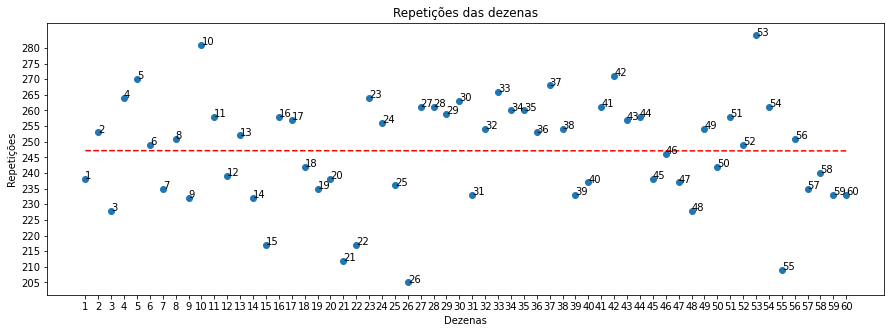

Menor qtd de repetições	: 205 		Dezenas: [26]
Maior qtd de repetições	: 284 		Dezenas: [53]
Média de repetições	: 247.0 	Dezenas: [6, 52] (entre 247.0 e 249.0)


In [13]:
eixo_x = list(df_aparicoes.dezenas[:])
eixo_y = list(df_aparicoes.repeticoes[:])

fig, ax = plt.subplots(figsize=(15, 5))

#ax.bar(eixo_x, eixo_y)
ax.scatter(eixo_x, eixo_y)

ax.set_xticks(range(1,len(df_aparicoes['dezenas'])+1))
ax.set_xticklabels(df_aparicoes['dezenas'])
ax.set_yticks(range(df_aparicoes.repeticoes.min(),df_aparicoes.repeticoes.max(),5))

#fig.suptitle('Repetições das dezenas')
plt.title('Repetições das dezenas')
plt.xlabel('Dezenas')
plt.ylabel('Repetições')

# linha abaixo foi dica em:
# https://pt.stackoverflow.com/questions/463589/linha-de-tendencia-em-scatterplot-no-matplotlib-em-python
z = np.polyfit(eixo_x, eixo_y, 1)
p = np.poly1d(z)
plt.plot(eixo_x,p(eixo_x),"r--")

for i in range(len(eixo_x)):
    plt.text(eixo_x[i], eixo_y[i], str(eixo_x[i]))

plt.show()

# Algumas informações a mais exibidas após o gráfico

print('Menor qtd de repetições\t:', df_aparicoes.repeticoes.min(),
      '\t\tDezenas:',
     df_group_repeticoes.query('repeticoes == repeticoes.min()').dezenas.values[0])
print('Maior qtd de repetições\t:', df_aparicoes.repeticoes.max(),
      '\t\tDezenas:',
      df_group_repeticoes.query('repeticoes == repeticoes.max()').dezenas.values[0])

lst_dezenas = []
for celula in df_group_repeticoes.query('repeticoes >= repeticoes.mean().round() - 1 & repeticoes <= repeticoes.mean().round() + 1').dezenas:
    for i in celula:
        lst_dezenas.append(i)

print('Média de repetições\t:', df_aparicoes.repeticoes.mean().round(), '\tDezenas:', lst_dezenas,
     f'(entre {df_group_repeticoes.repeticoes.mean().round() - 1} e {df_group_repeticoes.repeticoes.mean().round() + 1})')

## Alguma vez um jogo foi repetido?

Essa é a primeira pergunta feita em cima dos dados e até 17/04/2022, nenhum jogo foi repetido.

Esta informação gera um insight:
> **Para fazer uma aposta, preciso montar um jogo que nunca ocorreu**

Se um jogo nunca foi repetido, apostar num jogo já sorteado não seria uma boa aposta.

In [14]:
df.head()

,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6,dezenas_ordenadas
0,2471,2022-04-13,30,8,23,29,55,36,"[8, 23, 29, 30, 36, 55]"
1,2470,2022-09-04,51,8,48,42,33,40,"[8, 33, 40, 42, 48, 51]"
2,2469,2022-06-04,5,55,38,30,28,52,"[5, 28, 30, 38, 52, 55]"
3,2468,2022-02-04,22,41,53,42,35,57,"[22, 35, 41, 42, 53, 57]"
4,2467,2022-03-30,1,10,45,19,35,34,"[1, 10, 19, 34, 35, 45]"


In [15]:
# para cada jogo na coluna 'dezenas_ordenadas', converto numa string concatenando as dezenas
# faz isso para poder usar no collections.Counter onde será gerado um dict{jogo: contagem}
# depois pesquisa nesse dict quem tem value > 1 que seriam os jogos com ocorrência repetida

lst_jogos_str =[]
for jogo in df.dezenas_ordenadas:
    lst_jogos_str.append(','.join(str(dezena) for dezena in jogo))
dct_contagem = collections.Counter(lst_jogos_str)
lst_repetidos = [k for k, v in dct_contagem.items() if v > 1]
print(f'Jogos que já ocorreram mais de uma vez: {lst_repetidos}')

Jogos que já ocorreram mais de uma vez: []


## Quantidade de dezenas sorteadas em cada faixa de dezena

Faço a inclusão de 06 novas colunas no dataframe principal que contém todos os jogos.

São colunas mostrando quantos números foram sorteados em cada faixa de dezena em cada um dos concursos.

Essa informação será usada na ideia de montagem de jogo para aposta ao final desse notebook.

> Dataframe **df**
>
>    Dataframe principal com todos os concursos. Foi carregado a partir da planilha de jogos no início desse notebook.
>
>> * Coluna ***qtd_dezenas_1***
>>
>>    Quantidade de dezenas entre 01 e 10
>>
>>
>> * Coluna ***qtd_dezenas_2***
>>
>>    Quantidade de dezenas entre 11 e 20
>>
>>
>> * Coluna ***qtd_dezenas_3***
>>
>>    Quantidade de dezenas entre 21 e 30
>>
>>
>> * Coluna ***qtd_dezenas_4***
>>
>>    Quantidade de dezenas entre 31 e 40
>>
>>
>> * Coluna ***qtd_dezenas_5***
>>
>>    Quantidade de dezenas entre 41 e 50
>>
>>
>> * Coluna ***qtd_dezenas_6***
>>
>>    Quantidade de dezenas entre 51 e 60

In [16]:
dict_dezenas = {
    'dezenas_1': [1,2,3,4,5,6,7,8,9,10],
    'dezenas_2': [11,11,12,13,14,15,16,17,18,19,20],
    'dezenas_3': [21,21,22,23,24,25,26,27,28,29,30],
    'dezenas_4': [31,31,32,33,34,35,36,37,38,39,40],
    'dezenas_5': [41,41,42,43,44,45,46,47,48,49,50],
    'dezenas_6': [51,51,52,53,54,55,56,57,58,59,60]
}

col_dezenas_1 = []
col_dezenas_2 = []
col_dezenas_3 = []
col_dezenas_4 = []
col_dezenas_5 = []
col_dezenas_6 = []

for jogo in df.dezenas_ordenadas:
    
    i_dezenas_1  = 0
    i_dezenas_2 = 0
    i_dezenas_3 = 0
    i_dezenas_4 = 0
    i_dezenas_5 = 0
    i_dezenas_6 = 0
    
    for dezena in jogo:
        
        if dezena in dict_dezenas['dezenas_1']:
            i_dezenas_1 += 1
        elif dezena in dict_dezenas['dezenas_2']:
            i_dezenas_2 += 1
        elif dezena in dict_dezenas['dezenas_3']:
            i_dezenas_3 += 1
        elif dezena in dict_dezenas['dezenas_4']:
            i_dezenas_4 += 1
        elif dezena in dict_dezenas['dezenas_5']:
            i_dezenas_5 += 1
        elif dezena in dict_dezenas['dezenas_6']:
            i_dezenas_6 += 1
        
    col_dezenas_1.append(i_dezenas_1)
    col_dezenas_2.append(i_dezenas_2)
    col_dezenas_3.append(i_dezenas_3)
    col_dezenas_4.append(i_dezenas_4)
    col_dezenas_5.append(i_dezenas_5)
    col_dezenas_6.append(i_dezenas_6)
    
df['qtd_dezenas_1'] = col_dezenas_1
df['qtd_dezenas_2'] = col_dezenas_2
df['qtd_dezenas_3'] = col_dezenas_3
df['qtd_dezenas_4'] = col_dezenas_4
df['qtd_dezenas_5'] = col_dezenas_5
df['qtd_dezenas_6'] = col_dezenas_6

# verifica algum erro nas novas colunas
# for i in df.values:
#     if sum(i[9:]) != 6:
#         print('erro')

df.head()

,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6,dezenas_ordenadas,qtd_dezenas_1,qtd_dezenas_2,qtd_dezenas_3,qtd_dezenas_4,qtd_dezenas_5,qtd_dezenas_6
0,2471,2022-04-13,30,8,23,29,55,36,"[8, 23, 29, 30, 36, 55]",1,0,3,1,0,1
1,2470,2022-09-04,51,8,48,42,33,40,"[8, 33, 40, 42, 48, 51]",1,0,0,2,2,1
2,2469,2022-06-04,5,55,38,30,28,52,"[5, 28, 30, 38, 52, 55]",1,0,2,1,0,2
3,2468,2022-02-04,22,41,53,42,35,57,"[22, 35, 41, 42, 53, 57]",0,0,1,1,2,2
4,2467,2022-03-30,1,10,45,19,35,34,"[1, 10, 19, 34, 35, 45]",2,1,0,2,1,0


## Faixa de dezenas mais sorteadas

Com as contagens feitas acima e as colunas criadas é possível demonstras as faixas de dezenas mais sorteadas.

Faço essa demostração através de um gráfico de barras.

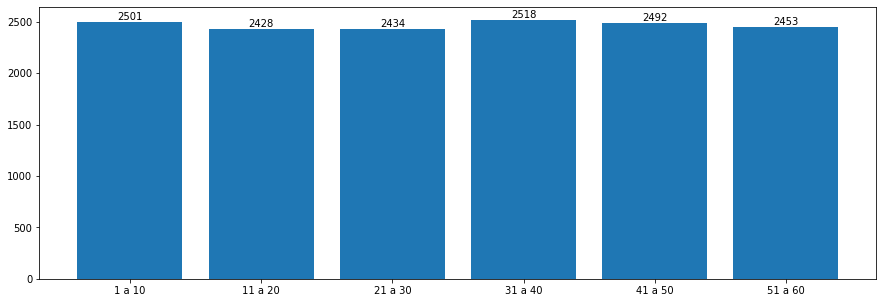

In [25]:
eixo_x = ['1 a 10', '11 a 20', '21 a 30', '31 a 40', '41 a 50', '51 a 60']
eixo_y = [sum(df['qtd_dezenas_1']), sum(df['qtd_dezenas_2']),
          sum(df['qtd_dezenas_3']), sum(df['qtd_dezenas_4']),
          sum(df['qtd_dezenas_5']), sum(df['qtd_dezenas_6'])]

fig, ax = plt.subplots(figsize=(15, 5))

barra = ax.bar(eixo_x, eixo_y)

# ax.set_xticks(x, eixo_x)

ax.bar_label(barra)

plt.show()

## Padrões de jogo

Temos as faixas de dezenas mais sorteadas e agora vamos para a ideia de que as dezenas sorteadas seguem um formato de jogo que chamo de padrões de jogo.

São seis dezenas sorteadas distribuidas em seis faixas de dezenas, então a ideia é identificar que padrões ocorrem.

Por exemplo:

* Padrão '2211'

    Padrão onde 2 números pertencem a uma faixa de dezena;
    outros 2 números em outra faixa de dezena;
    depois outros 2 números, cada um numa faixa de dezena diferente.
    
    Exemplo: dezenas sorteadas => 22,35,41,42,53,57
    22: faixa de dezena 3 (21 ao 30)
    35: faixa de dezena 4 (31 ao 40)
    41,42: faixa de dezena 5 (41 ao 50)
    53,57: faixa de dezena 6 (51 ao 60)
    
Faço a pesquisa finalizando com um gráfico de barras demonstrando os padrões de jogo que mais ocorrem.

In [18]:
lst_qtd_dezenas = []
str_padrao = ''
dict_padroes = {}

# colunas em df.columns[9:]
# ['qtd_dezenas_1', 'qtd_dezenas_2', 'qtd_dezenas_3', 'qtd_dezenas_4', 'qtd_dezenas_5', qtd_dezenas_6]

for linha in range(len(df)):
    
    for col in df.columns[9:]:
        lst_qtd_dezenas.append(df.loc[linha, col])

    lst_qtd_dezenas.sort(reverse=True)
    
    for i in lst_qtd_dezenas:
        str_padrao += str(i)
    
    str_padrao = str_padrao.replace('0', '')
    
    if dict_padroes.get(str_padrao):
        dict_padroes[str_padrao] += 1
    else:
        dict_padroes[str_padrao] = 1
    
    lst_qtd_dezenas = []
    str_padrao = ''

dict_padroes

{'3111': 381,
 '2211': 885,
 '222': 92,
 '21111': 684,
 '411': 55,
 '42': 16,
 '321': 299,
 '111111': 49,
 '51': 3,
 '33': 7}

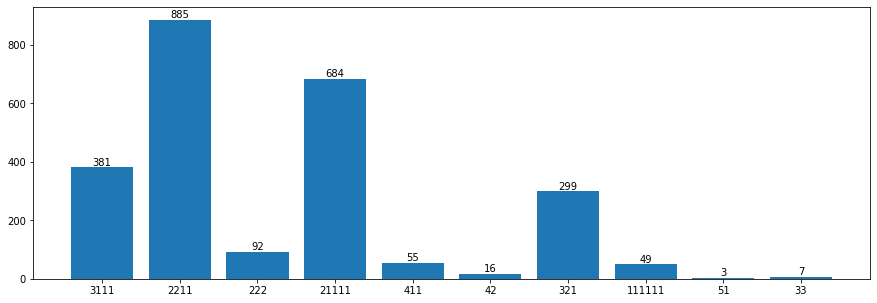

Cada dígito representa quantos números em cada faixa de dezena. Exemplo:

2211 => 2 números numa faixa de dezena, 
        outros 2 números em outra faixa de dezena, 
        1 número em outra faixa e 
        1 número em outra faixa


In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

vlr_barra = ax.bar(list(dict_padroes.keys()), list(dict_padroes.values()))

ax.bar_label(vlr_barra)

plt.show()

print('Cada dígito representa quantos números em cada faixa de dezena. Exemplo:\n')
print('2211 => 2 números numa faixa de dezena, \n \
       outros 2 números em outra faixa de dezena, \n \
       1 número em outra faixa e \n \
       1 número em outra faixa')

In [20]:
df.head()

,concurso,data,bola1,bola2,bola3,bola4,bola5,bola6,dezenas_ordenadas,qtd_dezenas_1,qtd_dezenas_2,qtd_dezenas_3,qtd_dezenas_4,qtd_dezenas_5,qtd_dezenas_6
0,2471,2022-04-13,30,8,23,29,55,36,"[8, 23, 29, 30, 36, 55]",1,0,3,1,0,1
1,2470,2022-09-04,51,8,48,42,33,40,"[8, 33, 40, 42, 48, 51]",1,0,0,2,2,1
2,2469,2022-06-04,5,55,38,30,28,52,"[5, 28, 30, 38, 52, 55]",1,0,2,1,0,2
3,2468,2022-02-04,22,41,53,42,35,57,"[22, 35, 41, 42, 53, 57]",0,0,1,1,2,2
4,2467,2022-03-30,1,10,45,19,35,34,"[1, 10, 19, 34, 35, 45]",2,1,0,2,1,0


# Ideia

Considerando que tenho essas informações:

1) Padrões de jogo que mais ocorreram: (até 18/abr/2022)
    <br>
    Padrão 2211, ou seja, duas faixas de dezenas com 2 números em cada e os outros 2 números em cada outra faixa de dezena.
    <br>
    Padrão 21111, ou seja, uma faixa de dezena com 2 números e os outros 4 números em cada outra faixa de dezena diferentes.

2) Faixas de dezenas que mais ocorreram: (até 18/abr/2022)<br>
    Nesta ordem: 31-40, 1-10, 41-50, 51-60, 21-30, 11-20

3) Dezenas que mais ocorreram.

Unindo essas três observações, a sugestão é que um jogo possa ser montado seguindo os principais padrões usando as dezenas de maior ocorrência dentro das faixas de dezenas com maior ocorrência, assim:

- Os padrões com mais ocorrências são: '2211' e '21111', citados acima.
- No padrão '2211', escolho 4 faixas de dezenas com mais ocorrências.
- Dentro dessas faixas de dezenas, escolho as dezenas de maior ocorrência.

Faço a mesma coisa para o padrão '21111'.

Ao final, um jogo em cada padrão é exibido com a informação de já ter ocorrido ou não.

In [21]:
# padrão '2211'
# pegar as duas faixas de dezenas mais ocorridas e
#  as duas dezenas dessas faixas mais ocorridas
# depois pegar as outras duas faixas de dezenas mais ocorridas e
#  uma dezena mais ocorrida de cada faixa
# mesma lógica para '21111'

# dataframe com faixas de dezenas e suas repetições
df_faixas_dezenas = pd.DataFrame(
    {
        'ini_faixa': [1,11,21,31,41,51],
        'fim_faixa': [10,20,30,40,50,60],
        'media_repeticoes': [sum(df['qtd_dezenas_1']), sum(df['qtd_dezenas_2']),
                             sum(df['qtd_dezenas_3']), sum(df['qtd_dezenas_4']),
                             sum(df['qtd_dezenas_5']), sum(df['qtd_dezenas_6'])]
    })

# ordeno dataframe pelas maiores repetições para ter as faixas de dezenas com mais ocorrências no topo
df_faixas_dezenas.sort_values('media_repeticoes', ascending=False, inplace=True)
df_faixas_dezenas.reset_index(drop=True, inplace=True)

# dict_padroes tem os padrões de jogos e suas ocorrências

lst_padroes       = [[2,2,1,1], [2,1,1,1,1]]  # padrões de jogos
lst_padroes_df    = ['2211', '21111']
lst_dezenas       = []
lst_jogos         = []
lst_jogo_ocorrido = []

# as duas primeiras faixas de dezenas com mais repetições de dezenas (em 15/04/2022 são 30-39 e 40-49)
for padrao in lst_padroes:
    for linha in range(len(padrao)):

        # filtro as duas dezenas mais repetidas dentro da faixa de dezena
        lst_temp = \
        df_aparicoes.query(f"dezenas >= {df_faixas_dezenas.loc[linha, 'ini_faixa']} & \
                             dezenas <= {df_faixas_dezenas.loc[linha, 'fim_faixa']}").sort_values('repeticoes', ascending=False).iloc[:padrao[linha]].dezenas.values

        for dezena in lst_temp:
            lst_dezenas.append(dezena)

        lst_temp = []
        
    lst_jogos.append(lst_dezenas)
    lst_jogo_ocorrido.append(not(ja_ocorreu(lst_dezenas).empty))  # func 'ja_ocorreu' criada no começo desse notebook
    lst_dezenas = []

df_jogos_sugeridos = pd.DataFrame({'padrao_de_jogo': lst_padroes_df, 'jogos': lst_jogos, 'jogo_ocorrido': lst_jogo_ocorrido})
df_jogos_sugeridos


,padrao_de_jogo,jogos,jogo_ocorrido
0,2211,"[5, 10, 33, 37, 42, 53]",False
1,21111,"[10, 23, 33, 37, 42, 53]",False


In [22]:
df_faixas_dezenas

,ini_faixa,fim_faixa,media_repeticoes
0,31,40,2518
1,1,10,2501
2,41,50,2492
3,51,60,2453
4,21,30,2434
5,11,20,2428


## Conclusão

Levando em consideração informações sobre os jogos sorteados e percebendo alguns comportamentos, principalmente, o que chamei de 'padrão de jogo', chego em um conjunto de dezenas mais ocorridas para formar um jogo com, talvez, mais chances de acontecer.

Claro que tudo é sorteio e qualquer número pode ser sorteado. Isso foi mais uma demonstração de formas de pesquisa usando o Python e suas bibliotecas.